In [1]:
# To write a Python 2/3 compatible codebase, the first step is to add this line to the top of each module
from __future__ import division, print_function, unicode_literals

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt  

In [2]:
kick10k = pd.read_csv('C:/Users/mayaa/OneDrive/Documents/project_BA/Kickstarter-Project-/kick10k.csv', index_col = None)

In [3]:
# Retrieve features/attributes of dataset
X = kick10k.iloc[:, 2:14]

# Retrieve target variable of dataset
y = kick10k.iloc[:,14]


In [5]:
kick10k.head()


,main_category,state,backers,usd_pledged_real,usd_goal_real,diff_days,deadline_month,deadline_day,deadline_weekday,launched_month,launched_day,launched_weekday,country_recoded,main_category_recoded,recoded_target
0,Publishing,successful,18,3715.00,3704.00,38,11,28,4,10,21,1,22,12,1
1,Film & Video,failed,31,2562.00,100000.00,60,5,28,2,3,29,5,22,6,0
2,Games,failed,37,3592.00,30000.00,30,11,10,5,10,11,3,22,8,0
3,Technology,failed,33,1475.06,2741.74,60,7,31,4,6,1,0,8,13,0
4,Film & Video,successful,27,10495.00,10000.00,25,6,26,1,6,1,4,22,6,1


#### Logisitc Regression With CV 

In [29]:
#dropping deadline day and deadline month 
#print(list(kick10k))

x2 = kick10k.iloc[:, np.r_[2:6, 8:14]]

x2

,backers,usd_pledged_real,usd_goal_real,diff_days,deadline_weekday,launched_month,launched_day,launched_weekday,country_recoded,main_category_recoded
0,18,3715.00,3704.00,38,4,10,21,1,22,12
1,31,2562.00,100000.00,60,2,3,29,5,22,6
2,37,3592.00,30000.00,30,5,10,11,3,22,8
3,33,1475.06,2741.74,60,4,6,1,0,8,13
4,27,10495.00,10000.00,25,1,6,1,4,22,6
...,...,...,...,...,...,...,...,...,...,...
9995,1531,105684.91,99000.00,29,5,10,18,4,22,6
9996,0,0.00,8111.62,30,6,11,16,4,9,10
9997,0,0.00,20000.00,32,5,4,14,1,22,5
9998,5,40.00,400.00,30,1,6,29,6,22,0


In [6]:
 from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import linear_model 

In [8]:
clf_lr = linear_model.LogisticRegression(C=1e5)

In [30]:
#F-1 scores
scores_f1=cross_val_score(clf_lr, x2, y, cv=20, scoring='f1_macro')
print("F1-score: %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std() * 2))# returns an array of scores of the estimator for each run of the cross validation.
print(scores_f1)

F1-score: 1.00 (+/- 0.00)
[1.         1.         1.         1.         1.         1.
 1.         1.         0.99793456 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.99792833 1.        ]


In [31]:
# Use all features of the data
scores = cross_val_score(clf_lr, x2, y, cv=10, scoring='f1_macro')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[1.         1.         1.         1.         0.99896613 1.
 1.         0.99896613 1.         0.99896535]
Accuracy: 1.00 (+/- 0.00)


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#normalizing the data 
sc = StandardScaler()
sc.fit(X) # Compute the mean and std to be used for later scaling 
X_train_std = sc.transform(X)

np.random.seed(42) # Ensure reproducability

inner_cv = KFold(n_splits=7, shuffle=True)
outer_cv = KFold(n_splits=7, shuffle=True)

In [12]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()                    #display figure
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples") #y label title
    plt.ylabel("Score")             #x label title
    
    # Class learning_curve determines cross-validated training and test scores for different training set sizes
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    # Cross validation statistics for training and testing data (mean and standard deviation)
    train_scores_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
    train_scores_std = np.std(train_scores, axis=1)   # Compute the standard deviation along the specified axis.
    test_scores_mean = np.mean(test_scores, axis=1)   # Compute the arithmetic mean along the specified axis.
    test_scores_std = np.std(test_scores, axis=1)     # Compute the standard deviation along the specified axis.

    plt.grid() # Configure the grid lines

    # Fill the area around the line to indicate the size of standard deviations for the training data
    # and the test data
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#555557") # train data performance indicated with red
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#7BC043") # test data performance indicated with green
    
    # Cross-validation means indicated by dots
    # Train data performance indicated with red
    plt.plot(train_sizes, train_scores_mean, 'o-', color="#555557",
             label="Training score")
    # Test data performance indicated with green
    plt.plot(train_sizes, test_scores_mean, 'o-', color="#7BC043",
             label="Cross-validation/Test score")

    plt.legend(loc="best") # Show legend of the plot at the best location possible
    return plt   

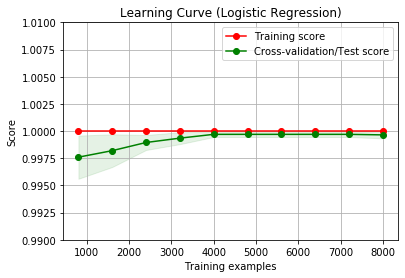

In [44]:
inner_cv = KFold(n_splits=5, shuffle=True)
outer_cv = KFold(n_splits=5, shuffle=True)

np.random.seed(42) # Ensure reproducability

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()                    #display figure
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples") #y label title
    plt.ylabel("Score")             #x label title
    
    # Class learning_curve determines cross-validated training and test scores for different training set sizes
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    # Cross validation statistics for training and testing data (mean and standard deviation)
    train_scores_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
    train_scores_std = np.std(train_scores, axis=1)   # Compute the standard deviation along the specified axis.
    test_scores_mean = np.mean(test_scores, axis=1)   # Compute the arithmetic mean along the specified axis.
    test_scores_std = np.std(test_scores, axis=1)     # Compute the standard deviation along the specified axis.

    plt.grid() # Configure the grid lines

    # Fill the area around the line to indicate the size of standard deviations for the training data
    # and the test data
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r") # train data performance indicated with red
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g") # test data performance indicated with green
    
    # Cross-validation means indicated by dots
    # Train data performance indicated with red
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    # Test data performance indicated with green
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation/Test score")

    plt.legend(loc="best") # Show legend of the plot at the best location possible
    return plt             # Function that returns the plot as an output


title = "Learning Curve (Logistic Regression)"

# Class ShuffleSplit is a random permutation cross-validator
# Parameter n_splits = Number of re-shuffling & splitting iterations
# Parameter test_size = represents the proportion of the dataset to include in the test split (float between 0.0 and 1.0) 
# Parameter random_state = the seed used by the random number generator
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
estimator = LogisticRegression() # Build multiple LRs as we increase the size of the traning data
# Plots the learning curve based on the previously defined function for the logistic regression estimator
plot_learning_curve(estimator, title, X, y, (0.99, 1.01), cv=cv, n_jobs=4)

plt.show() # Display the figure

The weights of the attributes are: [[ 0.39  7.95 -7.95  0.69  0.17 -0.81  0.1   0.17  0.58  0.07  0.8   0.4 ]]
1 [0. 1.] 1.0
Confusion matrix, without normalization
[[1200    0]
 [   0  800]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


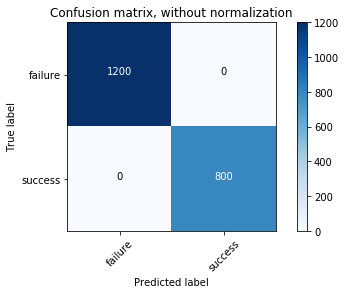

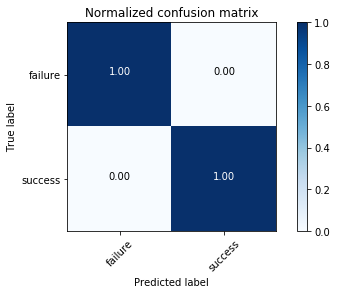

In [55]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
clf2 = linear_model.LogisticRegression(multi_class='auto', #accomondates multi-class categorical target variable
                                      C=1e5) 
                                             # C parameter is the inverse of regularization strength
                                             # C must be a positive float
                                             # C in this case is 1/lambda
                                             # Smaller values specify stronger regularization
                                             # Applies regularization by default; you can set C very large to avoid regularization (setting penalty l2 can speed up the estimations with a very large C)
# Train the model (fit the data)
# As with other classifiers, DecisionTreeClassifier takes as input two arrays: an array X, sparse or dense, 
# of size [n_samples, n_features] holding the training samples, and an array Y of integer values, size [n_samples], 
# holding the class labels for the training samples:
clf2 = clf2.fit(X_train, y_train)
print('The weights of the attributes are:', clf2.coef_)


#################################### Apply the Logistic Regression Model ####################################

y_pred = clf2.predict(X_test)             # Classification prediction
y_pred_prob = clf2.predict_proba(X_test)  # Class probabilities
print(y_pred[0], y_pred_prob[0], np.sum(y_pred_prob[0]))

################################### Evaluate the Logistic Regression Model ##################################



#############################################################################

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
###################################### Confusion Matrix #####################################


# Function that prints and plots the confusion matrix.
# Normalization can be applied by setting `normalize=True` (see below for examples)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix to evaluate the accuracy of a classification    
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

    
#cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes={'success', 'failure'},
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes={'success', 'failure'}, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
                    